In [ ]:
!pip install -r ./requirements.txt

In [2]:
import pandas as pd
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [3]:
df_train.head(5)

,image_path,font,font_size,color
0,images/d101fd9a-83cf-4a6c-974f-16b505b0c637.jpg,Sarabun-Regular,22,#DF3030
1,images/7531c3c5-e990-4daf-b44c-6b6a3f4eb5fd.jpg,Prompt-Regular,18,#DF3030
2,images/a5f69a02-3a51-457a-b043-6284ea1fd48e.jpg,FkBeautyRegular,28,#FF6666
3,images/52878fc8-1af5-497f-ac12-2834d8a5c27f.jpg,FkBeautyRegular,28,#0000FF
4,images/188ff66c-272f-4644-8c00-7e2cc171f1e7.jpg,KhaosuayThin,24,#DF3030


In [4]:
df_test.head(5)

,image_path,font,font_size,color
0,images/158b1476-5938-45dc-be90-9e50327c245d.jpg,NaN,NaN,NaN
1,images/da1628c5-6b4f-4ead-9514-e723355870e9.jpg,NaN,NaN,NaN
2,images/f75a8720-bdfb-465d-977a-1c208d23b2cc.jpg,NaN,NaN,NaN
3,images/ce67542f-d7d7-49ef-91f9-df686231154a.jpg,NaN,NaN,NaN
4,images/10df170a-ee18-4dbb-b8bc-0f5cd47ea861.jpg,NaN,NaN,NaN


In [103]:
import matplotlib.pyplot as plt 
import numpy as np 
from tqdm import tqdm

In [32]:
def plot_im(image_path):
    x = plt.imread(image_path)
    plt.imshow(x)

In [ ]:
def rgb_to_hex(rgb):
    """
    Convert an RGB color to a hexadecimal color code.

    Args:
        rgb (tuple): A tuple containing the RGB values (R, G, B).

    Returns:
        str: The hexadecimal color code.
    """
    r, g, b = rgb
    return "#{:02x}{:02x}{:02x}".format(r, g, b)

# Example usage
rgb_color = (255, 255, 255)
hex_color = rgb_to_hex(rgb_color)
print(hex_color)  # Output: #ffffff


In [53]:
from typing import List

def rgb_distance(color1: str, color2: str) -> float:
    """
    Calculate the Euclidean distance between two RGB colors.
    """
    # Convert hex color to RGB tuple
    def hex_to_rgb(hex_color: str) -> tuple:
        hex_color = hex_color.lstrip('#')
        return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

    r1, g1, b1 = hex_to_rgb(color1)
    r2, g2, b2 = hex_to_rgb(color2)
    
    return ((r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2) ** 0.5

def closest_color(target_color: str, color_options: List[str]) -> str:
    """
    Find the closest color from the list to the target color.
    """
    return min(color_options, key=lambda color: rgb_distance(target_color, color))

# Example usage
target_color = '#0600ad'
color_options = ['#FF6666', '#0000FF', '#A020F0', '#DF3030', '#26E953']
closest = closest_color(target_color, color_options)
print(f"The closest color to {target_color} is {closest}.")


The closest color to #0600ad is #0000FF.


In [71]:
import extcolors
import PIL

img = PIL.Image.open('images/1bd9e291-3476-4560-b807-86f94ea3b8ad.jpg')
colors, pixel_count = extcolors.extract_from_image(img)
# print(colors)

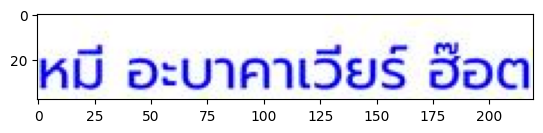

In [73]:
plot_im('images/1bd9e291-3476-4560-b807-86f94ea3b8ad.jpg')

In [58]:
colors[1][0]

(6, 0, 173)

In [81]:
len(colors)

6

In [94]:
if len(colors) >= 2:
    print(rgb_to_hex(colors[1][0]))
else:
    print(rgb_to_hex(colors[0][0]))

#0600ad


In [89]:
if len(colors) >= 2:
    color_hex = rgb_to_hex(colors[1][0])
else:
    color_hex = rgb_to_hex(colors[0][0])

In [95]:
closest_color('#0600ad', color_options)

'#0000FF'

In [88]:
closest_color(rgb_to_hex(colors[1][0]), color_options)

'#0000FF'

In [96]:
img = PIL.Image.open('images/1bd9e291-3476-4560-b807-86f94ea3b8ad.jpg')
colors, pixel_count = extcolors.extract_from_image(img)
    
if len(colors) >= 2:
    color_hex = rgb_to_hex(colors[1][0])
else:
    color_hex = rgb_to_hex(colors[0][0])
    
color_options = ['#FF6666', '#0000FF', '#A020F0', '#DF3030', '#26E953']
color_from_image = closest_color(color_hex, color_options)
# df_test['color'] = color_from_image
print(color_from_image)

#0000FF


In [104]:
for index, row in tqdm(df_test.iterrows()):
    img = PIL.Image.open(row['image_path'])
    colors, pixel_count = extcolors.extract_from_image(img)
        
    if len(colors) >= 2:
        color_hex = rgb_to_hex(colors[1][0])
    else:
        color_hex = rgb_to_hex(colors[0][0])
        
    color_options = ['#FF6666', '#0000FF', '#A020F0', '#DF3030', '#26E953']
    color_from_image = closest_color(color_hex, color_options)
    
    df_test.loc[index, 'color'] = color_from_image

2520it [00:30, 83.29it/s] 


In [100]:
df_test

,image_path,font,font_size,color
0,images/158b1476-5938-45dc-be90-9e50327c245d.jpg,NaN,NaN,#26E953
1,images/da1628c5-6b4f-4ead-9514-e723355870e9.jpg,NaN,NaN,#0000FF
2,images/f75a8720-bdfb-465d-977a-1c208d23b2cc.jpg,NaN,NaN,#FF6666
3,images/ce67542f-d7d7-49ef-91f9-df686231154a.jpg,NaN,NaN,#FF6666
4,images/10df170a-ee18-4dbb-b8bc-0f5cd47ea861.jpg,NaN,NaN,#FF6666
...,...,...,...,...
2515,images/bb5c8429-0a43-4816-8b2f-6687b381e98f.jpg,NaN,NaN,#A020F0
2516,images/2dde11bf-6aaa-45e3-a16a-65e0a3e35c6a.jpg,NaN,NaN,#A020F0
2517,images/c8e2da57-f55f-47d0-b664-908d4006a39f.jpg,NaN,NaN,#FF6666
2518,images/1bd9e291-3476-4560-b807-86f94ea3b8ad.jpg,NaN,NaN,#0000FF


In [101]:
df_test.to_csv('test_a.csv', index=0)

In [115]:
df_train

,image_path,font,font_size,color
0,images/d101fd9a-83cf-4a6c-974f-16b505b0c637.jpg,Sarabun-Regular,22,#DF3030
1,images/7531c3c5-e990-4daf-b44c-6b6a3f4eb5fd.jpg,Prompt-Regular,18,#DF3030
2,images/a5f69a02-3a51-457a-b043-6284ea1fd48e.jpg,FkBeautyRegular,28,#FF6666
3,images/52878fc8-1af5-497f-ac12-2834d8a5c27f.jpg,FkBeautyRegular,28,#0000FF
4,images/188ff66c-272f-4644-8c00-7e2cc171f1e7.jpg,KhaosuayThin,24,#DF3030
...,...,...,...,...
10075,images/880dd3ae-e8b4-451b-a8af-bb2b730bc366.jpg,Athiti-Regular,20,#A020F0
10076,images/721e03ec-f19b-4e50-a4ba-74a31bb10304.jpg,Kodchasan-Regular,22,#FF6666
10077,images/dacf634a-b484-4c4b-a536-12a4e46fcd23.jpg,Prompt-Regular,18,#A020F0
10078,images/658733a2-df61-4afa-99c8-454cd8dca303.jpg,NotoSerifThai-Regular,22,#26E953


In [71]:
!cp -r original images

In [ ]:
import cv2
import numpy as np

# load image
img = cv2.imread("fonts_dataset/train/Athiti-Regular/fdad7e33-0b25-479b-ac44-875a44fec94f.jpg")

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blur
blur = cv2.GaussianBlur(gray, (0,0), sigmaX=33, sigmaY=33)

# divide
divide = cv2.divide(gray, blur, scale=255)

# threshold
_, black_and_white_image = cv2.threshold(divide, 235, 255, cv2.THRESH_BINARY)

# write result to disk
cv2.imwrite("hebrew_text_division.jpg", black_and_white_image)

In [77]:
import os
import shutil
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# Define the base directory and font size threshold
base_dir = 'fonts_dataset'
threshold = 20

# Iterate through the dataframe and organize files
for index, row in df.iterrows():
    # Determine whether to place the image in 'train' or 'val' based on font_size
    subfolder = 'train' if row['font_size'] > threshold else 'valid'
    
    # Create the directory structure within fonts_dataset
    font_folder = os.path.join(base_dir, subfolder, row['font'])
    if not os.path.exists(font_folder):
        os.makedirs(font_folder)
    
    # Move the image to the appropriate folder
    shutil.move(row['image_path'], os.path.join(font_folder, os.path.basename(row['image_path'])))

print("Images have been organized into fonts_dataset.")

Images have been organized into fonts_dataset.


In [79]:
import cv2
import os

# Define the directory paths
input_dir = 'fonts_dataset/train'
output_dir = input_dir

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def process_image(file_path, output_path):
    # Read the image
    image = cv2.imread(file_path)
    
    # Check if image is read properly
    if image is not None:
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Blur
        blur = cv2.GaussianBlur(gray, (0, 0), sigmaX=33, sigmaY=33)
        
        # Divide
        divide = cv2.divide(gray, blur, scale=255)
        
        # Threshold (you can uncomment this if you want to apply thresholding)
        # _, black_and_white_image = cv2.threshold(divide, 235, 255, cv2.THRESH_BINARY)
        
        # Save the processed image
        cv2.imwrite(output_path, divide)
        
        print(f"Processed and saved: {file_path} to {output_path}")
    else:
        print(f"Failed to read image: {file_path}")

def process_directory(input_dir, output_dir):
    for root, dirs, files in os.walk(input_dir):
        # Construct the corresponding output directory
        relative_path = os.path.relpath(root, input_dir)
        output_root = os.path.join(output_dir, relative_path)
        
        # Create output subdirectories if they don't exist
        if not os.path.exists(output_root):
            os.makedirs(output_root)
        
        for filename in files:
            # Construct full file path
            file_path = os.path.join(root, filename)
            
            # Construct output file path
            output_path = os.path.join(output_root, filename)
            
            # Process the image
            process_image(file_path, output_path)

# Process all images in the directory and its subdirectories
process_directory(input_dir, output_dir)


Processed and saved: fonts_dataset/train/KhaosuayThin/5da860bd-0ffa-4af2-85e9-911c7b35bf57.jpg to fonts_dataset/train/KhaosuayThin/5da860bd-0ffa-4af2-85e9-911c7b35bf57.jpg
Processed and saved: fonts_dataset/train/KhaosuayThin/48231159-eab2-4ac8-b832-3ec2822be158.jpg to fonts_dataset/train/KhaosuayThin/48231159-eab2-4ac8-b832-3ec2822be158.jpg
Processed and saved: fonts_dataset/train/KhaosuayThin/b2b27d25-5b83-4860-94b4-7ea0998e2aa9.jpg to fonts_dataset/train/KhaosuayThin/b2b27d25-5b83-4860-94b4-7ea0998e2aa9.jpg
Processed and saved: fonts_dataset/train/KhaosuayThin/1bc28895-de3b-4c41-b8b9-4af48d814b7c.jpg to fonts_dataset/train/KhaosuayThin/1bc28895-de3b-4c41-b8b9-4af48d814b7c.jpg
Processed and saved: fonts_dataset/train/KhaosuayThin/0dbad734-0fb9-4570-8987-910d212c0b88.jpg to fonts_dataset/train/KhaosuayThin/0dbad734-0fb9-4570-8987-910d212c0b88.jpg
Processed and saved: fonts_dataset/train/KhaosuayThin/1a0e31c0-d355-468b-bde9-7cc0b5651f0b.jpg to fonts_dataset/train/KhaosuayThin/1a0e31c0-

In [82]:
from fastai.vision.learner import vision_learner
from fastai.vision.models import resnet50
from fastai.metrics import accuracy
from fastai.callback.tracker import SaveModelCallback
from fastbook import *

In [89]:
import torch
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ and/or you do not have an MPS-enabled device on this machine.")

In [95]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #x - image; y - single class
    get_items=get_image_files, #get image
    splitter=GrandparentSplitter(valid_name='valid'), #use parent folder as train-valid split
    get_y=parent_label, #use parent folder as label
    item_tfms=Resize(224)
    )
dls = dblock.dataloaders('fonts_dataset', bs=64, device="mps")

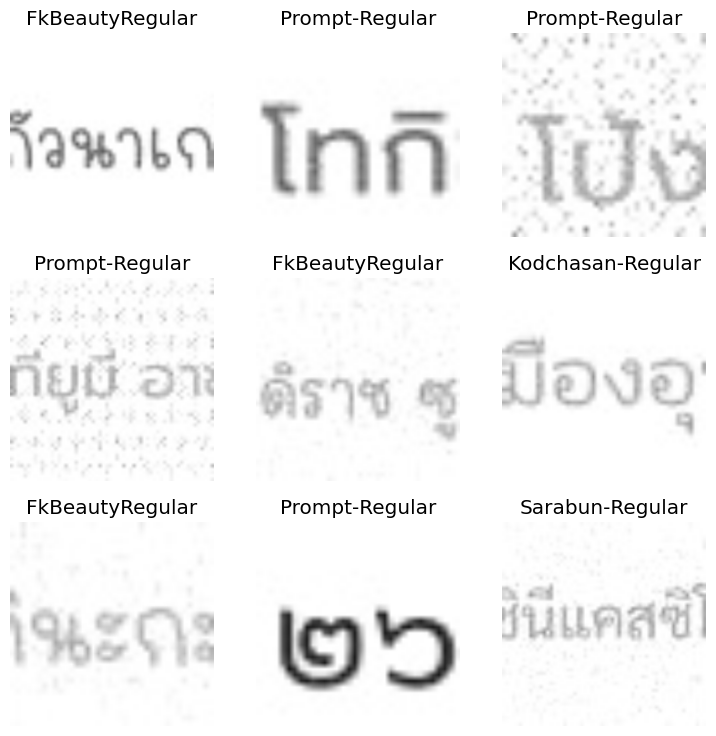

In [96]:
dls.train.show_batch(max_n=9,nrows=3)

In [97]:
save_dir = 'model_font_size'
fname = save_dir + 'Model_Resnet50_Best'
cb = [
    EarlyStoppingCallback(monitor='valid_loss', min_delta=0, patience=5),
    SaveModelCallback(monitor='accuracy', fname=fname, every_epoch=False, with_opt=True, reset_on_fit=False)
]
learn = cnn_learner(dls, resnet50, metrics=accuracy, pretrained=True, cbs=cb)
learn.fine_tune(epochs=30, freeze_epochs=1, base_lr=2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.008035,13.022054,0.152976,02:41


Better model found at epoch 0 with accuracy value: 0.15297618508338928.


epoch,train_loss,valid_loss,accuracy,time
0,1.303680,16.541710,0.145238,03:03
1,1.027077,19.988337,0.135119,03:03
2,0.773863,25.605034,0.139286,03:04
3,0.582650,38.721851,0.133036,03:03
4,0.420164,31.911497,0.138393,03:04
5,0.323753,30.954630,0.131250,03:03


No improvement since epoch 0: early stopping


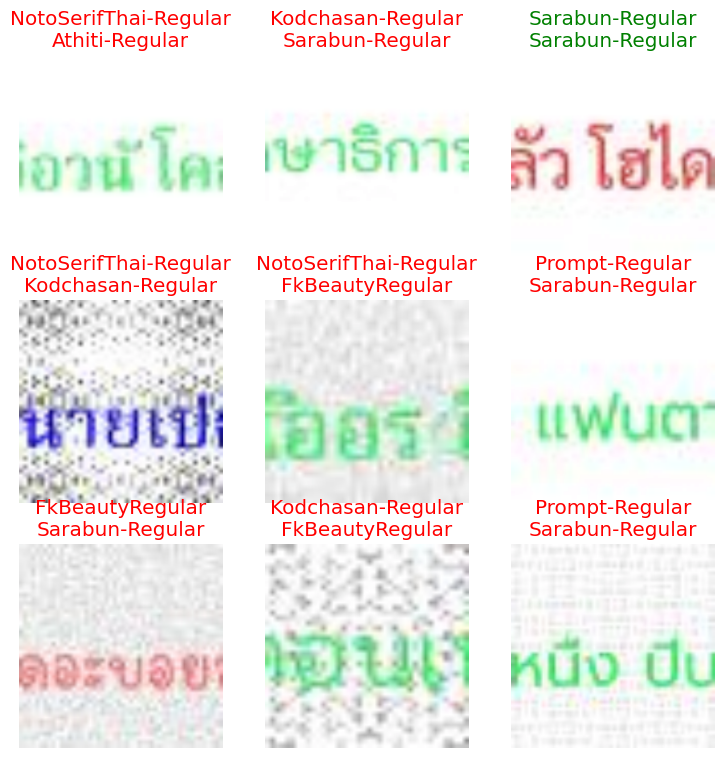

In [98]:
learn.show_results()

In [104]:
!cp -r original images

cp: original: No such file or directory


In [110]:
import os
import shutil
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# Define the base directory and font size threshold
base_dir = 'fonts_size_dataset'
threshold = 20

# Iterate through the dataframe and organize files
for index, row in df.iterrows():
    # Determine whether to place the image in 'train' or 'val' based on font_size
    subfolder = 'train' if index > threshold else 'valid'
    
    # Create the directory structure within fonts_dataset
    font_folder = os.path.join(base_dir, subfolder, str(row['font_size']))
    if not os.path.exists(font_folder):
        os.makedirs(font_folder)
    
    # Move the image to the appropriate folder
    shutil.move(row['image_path'], os.path.join(font_folder, os.path.basename(row['image_path'])))

print("Images have been organized into fonts_dataset.")

Images have been organized into fonts_dataset.


In [111]:
import cv2
import os

# Define the directory paths
input_dir = 'fonts_size_dataset/train'
output_dir = input_dir

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def process_image(file_path, output_path):
    # Read the image
    image = cv2.imread(file_path)
    
    # Check if image is read properly
    if image is not None:
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Blur
        blur = cv2.GaussianBlur(gray, (0, 0), sigmaX=33, sigmaY=33)
        
        # Divide
        divide = cv2.divide(gray, blur, scale=255)
        
        # Threshold (you can uncomment this if you want to apply thresholding)
        # _, black_and_white_image = cv2.threshold(divide, 235, 255, cv2.THRESH_BINARY)
        
        # Save the processed image
        cv2.imwrite(output_path, divide)
        
        print(f"Processed and saved: {file_path} to {output_path}")
    else:
        print(f"Failed to read image: {file_path}")

def process_directory(input_dir, output_dir):
    for root, dirs, files in os.walk(input_dir):
        # Construct the corresponding output directory
        relative_path = os.path.relpath(root, input_dir)
        output_root = os.path.join(output_dir, relative_path)
        
        # Create output subdirectories if they don't exist
        if not os.path.exists(output_root):
            os.makedirs(output_root)
        
        for filename in files:
            # Construct full file path
            file_path = os.path.join(root, filename)
            
            # Construct output file path
            output_path = os.path.join(output_root, filename)
            
            # Process the image
            process_image(file_path, output_path)

# Process all images in the directory and its subdirectories
process_directory(input_dir, output_dir)

Processed and saved: fonts_size_dataset/train/20/ce9b0045-ddd6-405b-b7a1-203f28d3d930.jpg to fonts_size_dataset/train/20/ce9b0045-ddd6-405b-b7a1-203f28d3d930.jpg
Processed and saved: fonts_size_dataset/train/20/35010f08-c513-4df5-a54c-40f1c7360fa2.jpg to fonts_size_dataset/train/20/35010f08-c513-4df5-a54c-40f1c7360fa2.jpg
Processed and saved: fonts_size_dataset/train/20/be997fe3-7488-4a1f-9f2c-cb5f12c48362.jpg to fonts_size_dataset/train/20/be997fe3-7488-4a1f-9f2c-cb5f12c48362.jpg
Processed and saved: fonts_size_dataset/train/20/34aa1ff6-5daf-41a3-a1d1-46f7d0c157d0.jpg to fonts_size_dataset/train/20/34aa1ff6-5daf-41a3-a1d1-46f7d0c157d0.jpg
Processed and saved: fonts_size_dataset/train/20/3bf1fb8f-c8f9-4beb-847c-18ce2cd23da9.jpg to fonts_size_dataset/train/20/3bf1fb8f-c8f9-4beb-847c-18ce2cd23da9.jpg
Processed and saved: fonts_size_dataset/train/20/c14daa2b-2c3c-4d7e-a3a6-02ac4b864ed1.jpg to fonts_size_dataset/train/20/c14daa2b-2c3c-4d7e-a3a6-02ac4b864ed1.jpg
Processed and saved: fonts_s

In [112]:
from fastai.vision.learner import vision_learner
from fastai.vision.models import resnet50
from fastai.metrics import accuracy
from fastai.callback.tracker import SaveModelCallback
from fastbook import *

In [113]:
import torch
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ and/or you do not have an MPS-enabled device on this machine.")

In [117]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #x - image; y - single class
    get_items=get_image_files, #get image
    splitter=GrandparentSplitter(valid_name='valid'), #use parent folder as train-valid split
    get_y=parent_label, #use parent folder as label
    item_tfms=Resize(224)
    )
dls = dblock.dataloaders('fonts_size_dataset', bs=64, device="mps")

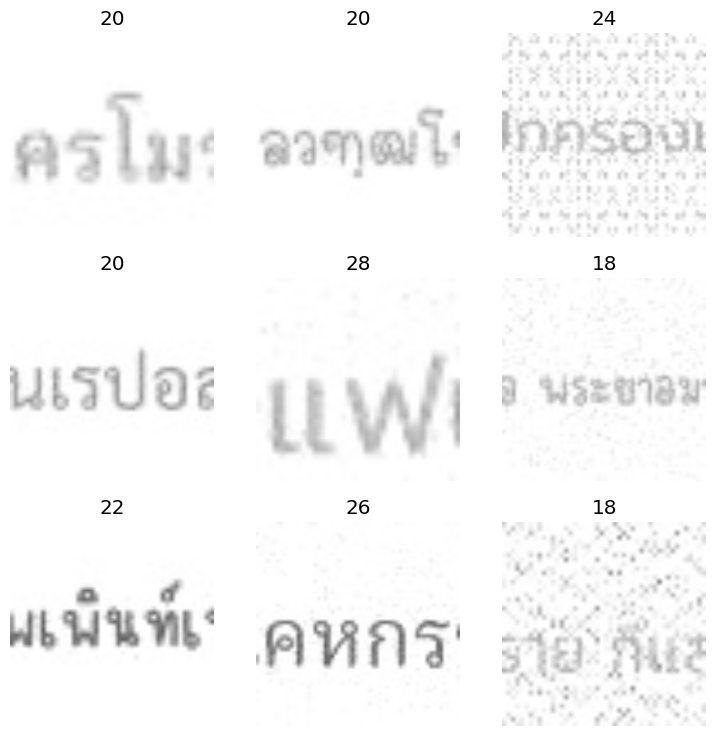

In [118]:
dls.train.show_batch(max_n=9,nrows=3)

In [125]:
save_dir = 'model_font_size'
fname = save_dir + 'Model_resnet101_Best'
cb = [
    EarlyStoppingCallback(monitor='valid_loss', min_delta=0, patience=2),
    SaveModelCallback(monitor='accuracy', fname=fname, every_epoch=False, with_opt=True, reset_on_fit=False)
]
learn = cnn_learner(dls, resnet101, metrics=accuracy, pretrained=True, cbs=cb)
learn.fine_tune(epochs=10, freeze_epochs=1, base_lr=2e-3)
learn.show_results()

/Users/pogus-mac/Documents/Project-VScode/mark-ngai/.venv/lib/python3.11/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /Users/pogus-mac/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:02<00:00, 81.7MB/s] 


epoch,train_loss,valid_loss,accuracy,time
0,2.409752,5.888706,0.285714,12:51


Better model found at epoch 0 with accuracy value: 0.2857142984867096.


/Users/pogus-mac/Documents/Project-VScode/mark-ngai/.venv/lib/python3.11/site-packages/fastai/learner.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 